In [4]:
import numpy as np
from scipy.special import jv
import xraydb 
from datetime import datetime
import matplotlib.pyplot as plt
from mossbauer_analysis.mossbauer_theory import CobaltRhodium, CobaltFe, KFeCy, alphaFe, Mossbauer    #import classes for sources, absorbers, and the mossbauer transmission spectrum

In [ ]:
#constants and parameters
hbar = 1.0545718e-34 # J.s
h = 6.62607015e-34 # J.s
c = 2.99792458e8 # m/s
k = 1.380649e-23 # J/K
T = 300 # K
e = 1.602176634e-19 # J
kB = 1.38e-23

#mossbauer parameters
Emos_ev = 14.413e3 # keV
Emos = Emos_ev * e # J
Gamma_mos_ev = 4.7e-9
Gamma_mos = Gamma_mos_ev * e # J
lambda_mos = h * c / (Emos) # 
k_mos = 2 * np.pi / lambda_mos 

n_mos = 1e8 #photns per second
#lambda_mos/(1e-8* 8 * np.pi* 1e8) # m

#saw parameters
lambda_saw = 32e-6 # mb
v_s = 3091 # m/s
k_saw = 2 * np.pi / lambda_saw # m^-1
nu_saw_theory = v_s/lambda_saw
nu_saw = 97.9e6 # MHz
Omega_saw = 2 * np.pi * nu_saw
rho_quartz = 2650 # kg/m^3
w = 1e-3 # m
L = 4e-3




In [27]:
# units conversions

mms_to_ev = lambda x: x/1000*Emos_ev/c
ev_to_mms = lambda x: x*1000/Emos_ev*c


hz_to_mms = lambda x: x*h*c/e/Emos_ev*1000
mms_to_hz = lambda x: x/h/c*e*Emos_ev/1000

ev_to_hz  = lambda x: x * e / h
hz_to_ev = lambda x: x * h / e

#source linewidth
ev_to_hz(7e-9)/1e6, 

#device spacing
hz_to_mms(97.9e6),

(8.421600656775345,)

In [ ]:

h*nu_saw/e/Emos_ev*c, Gamma_mos_ev

#2.1e-3*e*Emos_ev/c/h/1e6
##

#mm/s to ev
8.4e-3*Emos_ev/c, c/Emos_ev*1e-9*1e3

#1/140e-9/1e6
hbar/Gamma_mos 
h*1e6/e/Emos_ev, Gamma_mos_ev

np.sqrt(hbar/(2*rho_quartz*v_s*L*w))

kB*T/(hbar*Omega_saw)/1e4
h*1e6/e/Emos_ev

In [11]:
#For silicon nitride membranes

omega_mem = 2*np.pi*1e6
m_mem = 10e-15 

np.sqrt(hbar/(2*m_mem*omega_mem))

2.896897606192853e-14

## Mossbauer total rate

In [27]:
activity_ci = 30e-3
activity_bq = 3.7e10 *activity_ci
122 = 0.855
alpha = 8.44
relative_intensity_14 = relative_intensity_122*1/(1+alpha)
rate_14 = activity_bq * relative_intensity_14
area = 4e-3*1e-3
distance = 0.10
eta_solid_angle = area/(4*np.pi*distance**2)
eta_quartz = np.exp(-xraydb.material_mu('quartz', 14.4e3)*500e-6*100)
actual_rate_14 = rate_14*eta_solid_angle*eta_quartz
actual_rate_14*(1+0.38+0.28), actual_rate_14 ,actual_rate_14*0.38,actual_rate_14*0.28,actual_rate_14*(1+0.38+0.28)/1024


(2232.689264809235,
 1344.9935330176115,
 511.0975425466924,
 376.5981892449313,
 2.1803606101652684)

## SAW power losses

In [51]:
S22_res_db = -2.35
S22_0_db =  -0.67

S21_res_db = -18.2
S21_0_db = -80


S22_res = 10**(S22_res_db/20)
S22_0 = 10**(S22_0_db/20)   
S21_res = 10**(S21_res_db/20)
S21_0 = 10**(S21_0_db/20) 
eta_r = 0.36

Psaw = S22_0**2 - S22_res**2

Pout = (Psaw*(1-eta_r**2))**2/4



10*np.log10(Pout), S21_res_db
#Pout, S21_res, S22_0


(-18.441633430222492, -18.2)

In [44]:
S22_res,S22_0, S22_0 - S22_res,1-(S22_res)


(0.5821032177708714,
 0.8570378452303696,
 0.27493462745949826,
 0.4178967822291286)

In [1]:
activity_bq/1e9,relative_intensity_14,eta_solid_angle*eta_quartz 
(0.38+0.28)/(1+0.38+0.28)

NameError: name 'activity_bq' is not defined

In [7]:
Sf = (hbar*k)**2*n_mos
rho = 2620 # kg/m^3
vs = 3000 # m/s
chi = 1/(2*np.pi*100e6*rho*vs)
Sx = Sf * chi**2

Psaw = Sx*1e6
np.sqrt(Psaw)

2.948200544649535e-66

In [105]:
def lorentzian1(p, x):

    c0, x0, fullwidth, rate = p
    
    return rate*(1 -  c0*(fullwidth/2)**2 / ((x - x0)**2 + (fullwidth/2)**2))


(0.13732785128896877,
 0.11900635987540067,
 109.15631959713637,
 0.4123607978830409,
 0.2916666666666667)

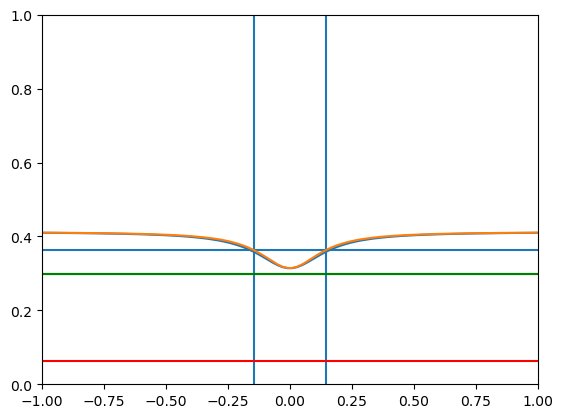

In [115]:
source = CobaltRhodium()
source.Gamma_ev = 8e-9
source.update_params()

absorber = KFeCy()
absorber.Gamma_ev = 6e-9
absorber.update_params()

moss = Mossbauer(source, absorber)

v = np.linspace(-10,10,1000)
norm = moss.source.mossbauer_photon_rate
t = moss.total_transmission_rate1(v)/norm



plt.plot(v, t, label = 'Fe')

plt.axhline((1-((t.max()-t.min())/2/t.max()))*moss.non_resonant_attenuation())
plt.axvline(-(source.Gamma + absorber.Gamma)/2)
plt.axvline((source.Gamma + absorber.Gamma)/2)

plt.axhline((1 - source.fs)*moss.non_resonant_attenuation(),color = 'r')
plt.axhline((1 - source.fs*moss.epsilon(absorber.thickness_normalized))*moss.non_resonant_attenuation(),color = 'g')

plt.axhline((1 - source.fs*moss.epsilon(absorber.thickness_normalized))*moss.non_resonant_attenuation(),color = 'g')


plt.ylim(0,1)
plt.xlim(-1,1)

total_width = absorber.Gamma+source.Gamma

B = 0.5
vis = moss.epsilon(absorber.thickness_normalized)*source.fs

p = [(t.max()-t.min())/(t.max()), 0, total_width, t.max()]
plt.plot(v, lorentzian1(p,v))

vis*(1-B), (t.max()-t.min())/(t.max())*(1-B), source.mossbauer_photon_rate/1e6, moss.non_resonant_attenuation(), total_width



In [102]:
t.max(), t.min()

(0.4123482405205477, 0.3001022648015672)

(0.24343652099018412,
 0.21718362930490587,
 109.15497012539117,
 0.28477637176683074,
 0.2916666666666667)

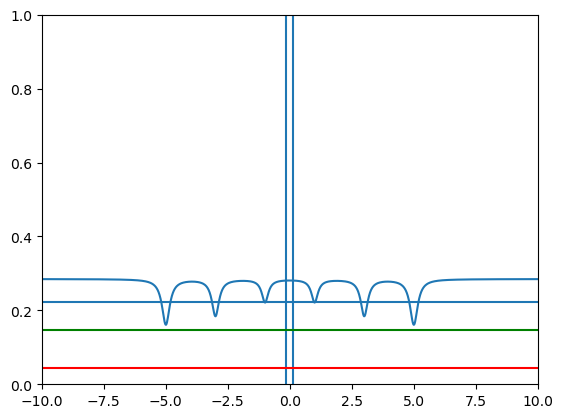

In [125]:
source = CobaltRhodium()
source.Gamma_ev = 8e-9
source.update_params()

absorber = alphaFe()
absorber.Gamma_ev = 6e-9
absorber.thickness_m = 25e-6  # thickness in m
absorber.abundance = 0.0212
absorber.update_params()

moss = Mossbauer(source, absorber)

v = np.linspace(-10,10,1000)
t = moss.total_transmission_rate1(v)
norm = moss.source.mossbauer_photon_rate


plt.plot(v, t/norm, label = 'Fe')

plt.axhline((1-((t.max()-t.min())/2/t.max()))*moss.non_resonant_attenuation())
plt.axvline(-(source.Gamma + absorber.Gamma)/2)
plt.axvline((source.Gamma + absorber.Gamma)/2)

plt.axhline((1 - source.fs)*moss.non_resonant_attenuation(),color = 'r')
plt.axhline((1 - source.fs*moss.epsilon(absorber.thickness_normalized*3/12))*moss.non_resonant_attenuation(),color = 'g')



plt.ylim(0,1)
plt.xlim(-10,10)

total_width = absorber.Gamma+source.Gamma

B = 0.5
vis = moss.epsilon(absorber.thickness_normalized*3/12)*source.fs*(1-B)
vis, (t.max()-t.min())/(t.max())*(1-B), source.mossbauer_photon_rate/1e6, moss.non_resonant_attenuation(), total_width

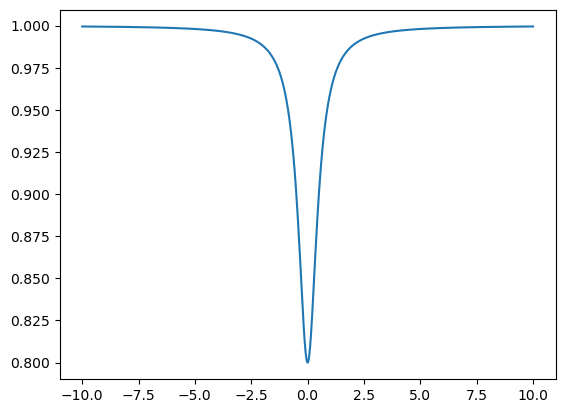

In [90]:
p = [-0.2, 0, 1, 1]
plt.plot(v, lorentzian1(p,v))

In [109]:
0.19*1.25

0.2375